In [56]:
%matplotlib inline
import matplotlib
matplotlib.rc("axes", labelsize=24)
matplotlib.rc("axes", titlesize=16)

In [16]:
import ROOT
import rootpy.plotting.root2matplotlib as rplt
import rootpy
import pandas
import root_numpy as rnpy
import rootpy.io
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def get_df(fn):
    arr = rnpy.root2array(fn)
    df = pandas.DataFrame(arr)
    return df

In [85]:
df1.columns

Index([u'cosl1l2', u'cosl1l2_frame2', u'lep1_pt_frame2', u'lep2_pt_frame2', u'lep1_pt', u'lep2_pt', u'top1_pt', u'top2_pt', u'dilep_m'], dtype='object')

In [91]:
df1 = get_df("/Users/joosep/Documents/top-quark-YRM/plots_ttaa.root")
df2 = get_df("/Users/joosep/Documents/top-quark-YRM/plots_tth.root")
df_mix0 = get_df("/Users/joosep/Documents/top-quark-YRM/plots_bsmmix.root")
df_sm = get_df("/Users/joosep/Documents/top-quark-YRM/plots_bsm0plus.root")
df_bsm0minus = get_df("/Users/joosep/Documents/top-quark-YRM/plots_bsm0minus.root")

In [62]:
df["lep1_pt"].hist(bins=np.linspace(0, 1000, 100))

NameError: name 'df' is not defined

(1e-08, 1.0)

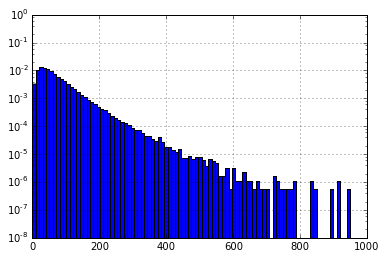

In [96]:
df["lep1_pt"].hist(bins=np.linspace(0, 1000, 100), normed="True")
plt.yscale("log")
plt.ylim(0.00000001,1.0)

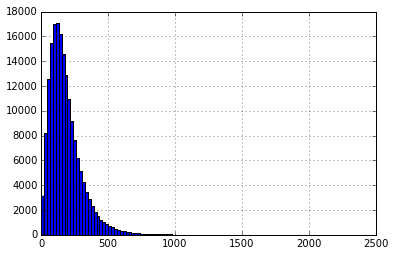

In [97]:
df["top1_pt"].hist(bins=100)

In [30]:
def makeHist(l, bins, name):
    h = rootpy.plotting.Hist(*bins)
    weights = np.ones(len(l), "float")
    h.FillN(len(l), l.as_matrix().view("float"), weights)
    h.title = name
    return h

In [158]:
df1.eval("1==1")

True

In [173]:

def plotVariable(vname, bins, cut="top1_pt>0"):
    h_bkg = makeHist(df1[df1.eval(cut)][vname], bins, "$t\\bar{t} + \\gamma \\gamma$")
    h_sig = makeHist(df2[df2.eval(cut)][vname], bins, "$t\\bar{t} + H(\\gamma \\gamma)$")

    h_mix0 = makeHist(df_mix0[df_mix0.eval(cut)][vname], bins, "BSM 0+ 0- mix")
    h_sm = makeHist(df_sm[df_sm.eval(cut)][vname], bins, "BSM 0+")

    h_bsm0minus = makeHist(df_bsm0minus[df_bsm0minus.eval(cut)][vname], bins, "BSM 0-")
    hists = [h_sig, h_bkg, h_sm, h_mix0, h_bsm0minus]
    for h in hists:
        h.Scale(1.0 / h.Integral())
    h_bkg.color = "red"
    h_bkg.markerstyle = "^"
    h_sig.color = "blue"
    h_sig.linestyle = "dashed"
    h_mix0.color = "green"
    h_sm.color = "cyan"
    h_bsm0minus.color = "orange"
    ratios = []
    for h in hists:
        h = h.Clone()
        h.Divide(hists[0])
        ratios += [h]
    plt.figure(figsize=(6,8))
    a1 = plt.axes([0.0,0.22, 1.0, 0.8])
    for h in hists[0:2]:
        rplt.errorbar(h, label=h.title)
    for h in hists[2:]:
        rplt.hist(h, label=h.title)
    plt.legend(loc="best")
    plt.ylabel("fraction of events")
    #plt.ylim(0.04, 0.06)
    a2 = plt.axes([0.0,0.0, 1.0, 0.18], sharex=a1)
    for h in ratios[0:2]:
        rplt.errorbar(h, label=h.title)
    for h in ratios[2:]:
        rplt.hist(h, label=h.title)
    #plt.ylim(0.5,1.5)
    return a1, a2

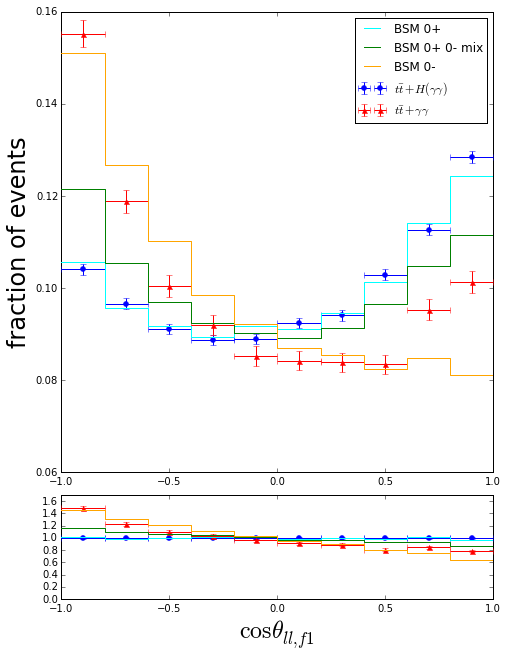

In [174]:
a1, a2 = plotVariable("cosl1l2", (10, -1, 1))
a1.set_ylim(0.06,0.16)
a2.set_xlabel("$\\cos{\\theta_{ll, f1}}$")
plt.savefig("costheta_ll_frame1.pdf", pad_inches=0.5, bbox_inches='tight')

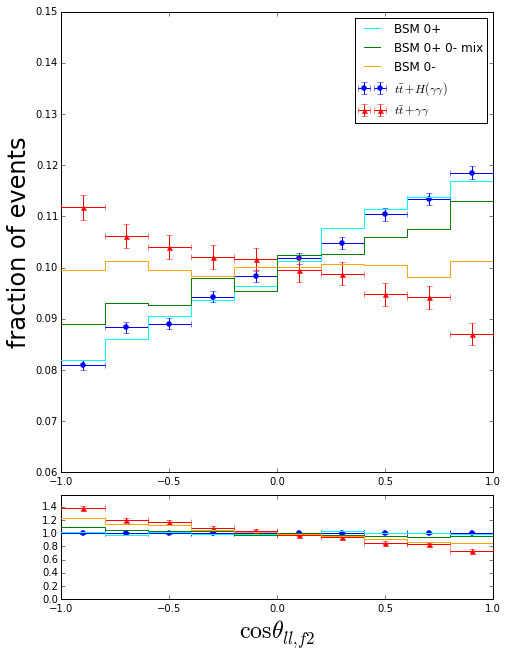

In [175]:
a1, a2 = plotVariable("cosl1l2_frame2", (10, -1, 1))
a1.set_ylim(0.06,0.15)
a2.set_xlabel("$\\cos{\\theta_{ll, f2}}$")
plt.savefig("costheta_ll_frame2.pdf", pad_inches=0.5, bbox_inches='tight')

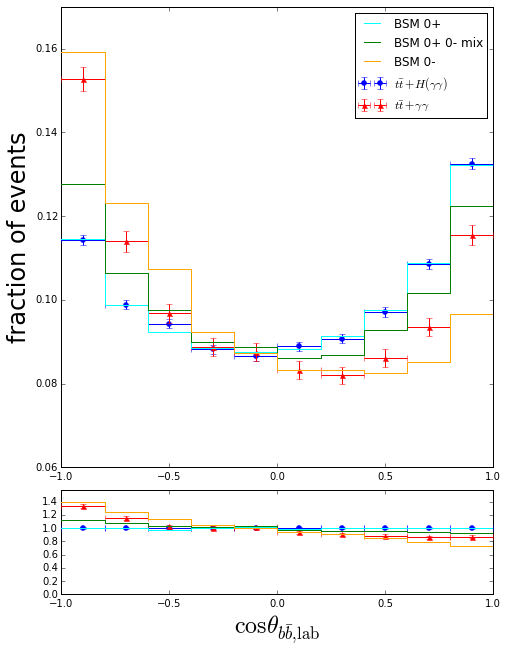

In [181]:
a1, a2 = plotVariable("cosb1b2_lab", (10, -1, 1))
a1.set_ylim(0.06,0.17)
a2.set_xlabel("$\\cos{\\theta_{b\\bar{b}, \\mathrm{lab}}}$")
plt.savefig("costheta_b1b2_lab.pdf", pad_inches=0.5, bbox_inches='tight')

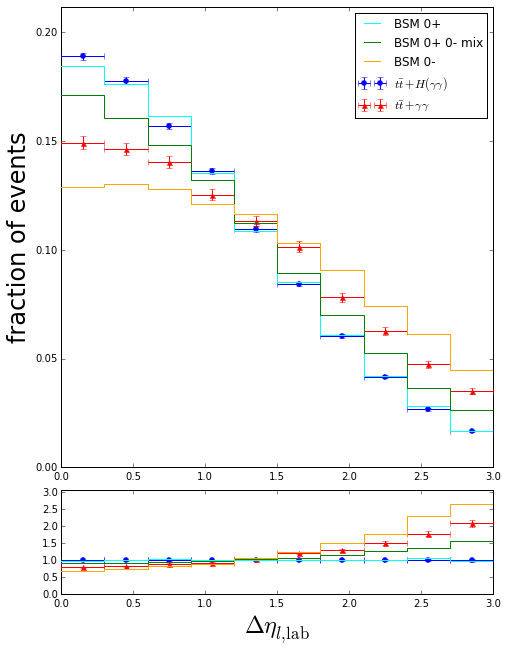

In [176]:
a1, a2 = plotVariable("etal_lab", (10, 0, 3))
#a1.set_ylim(0.06,0.15)
a2.set_xlabel("$\\Delta \\eta_{l,\\mathrm{lab}}$")
plt.savefig("deltaeta_lepton_lab.pdf", pad_inches=0.5, bbox_inches='tight')

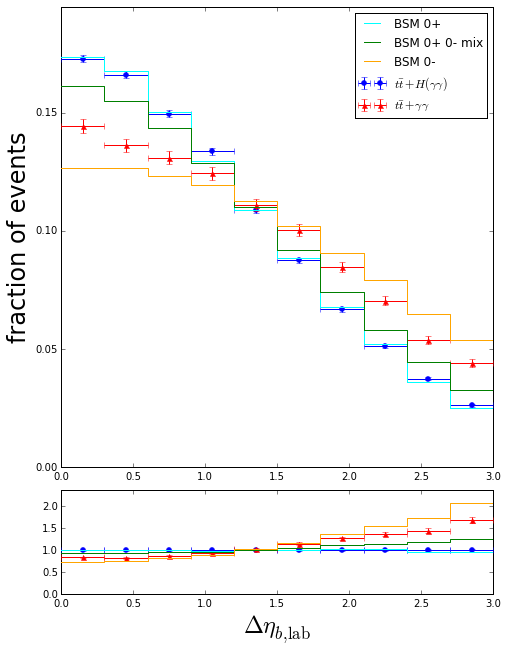

In [177]:
a1, a2 = plotVariable("etab_lab", (10, 0, 3))
#a1.set_ylim(0.06,0.15)
a2.set_xlabel("$\\Delta \\eta_{b,\\mathrm{lab}}$")
plt.savefig("deltaeta_b_lab.pdf", pad_inches=0.5, bbox_inches='tight')